#Install & Import Libraries


In [ ]:
!pip3 install pydub
!pip3 install xmltodict
!pip3 install resemblyzer
!pip3 install pyannote.core
!pip3 install noisereduce
!pip3 install pyannote.metrics
!pip3 install python_speech_features
!pip3 install spectralcluster
!pip3 install hdbscan
!pip3 install keras
!pip3 install tensorflow_addons

     |████████████████████████████████| 15.7MB 183kB/s 
     |████████████████████████████████| 81kB 9.2MB/s 
     |████████████████████████████████| 71kB 8.4MB/s 
  Created wheel for typing: filename=typing-3.7.4.3-cp37-none-any.whl size=26308 sha256=8087ef0004d9ee57e8d6094a466df645903fce47bad7bc583e4269acc4813fa9
  Stored in directory: /root/.cache/pip/wheels/2d/04/41/8e1836e79581989c22eebac3f4e70aaac9af07b0908da173be
  Created wheel for webrtcvad: filename=webrtcvad-2.0.10-cp37-cp37m-linux_x86_64.whl size=72318 sha256=b8bd00bcd3cac530ad4bcbdf2ab3e99353b321733a4afd770974ff3abced3dd8
  Stored in directory: /root/.cache/pip/wheels/44/2a/18/bd1aec41cac7c3051fe95d92a6ed446122ea31dc713c432fa1
Successfully built typing webrtcvad


     |████████████████████████████████| 61kB 4.7MB/s 
     |████████████████████████████████| 133kB 12.2MB/s 
  Created wheel for noisereduce: filename=noisereduce-1.1.0-cp37-none-any.whl size=7610 sha256=2539e805538f55419533bfde197976e51ce37769951dcd637193368a79a97fe9
  Stored in directory: /root/.cache/pip/wheels/a6/2c/70/f9ccb41280dcfbe3eaeb7930f913dd85394617f3d3136f29cc
Successfully built noisereduce
     |████████████████████████████████| 51kB 4.1MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
     |████████████████████████████████| 92kB 7.0MB/s 
  Found existing installation: click 8.0.0
    Uninstalling click-8.0.0:
      Successfully uninstalled click-8.0.0
  Created wheel for python-speech-features: filename=python_speech_features-0.6-cp37-none-any.whl size=5887 sha256=8005cfd954262070ef8b32288c205460bfdd92c06b17f5bf4e73eea8c673a657
  Stored in directory: /root/.cache/pip/wheels/3c/42/7c/f60e9d1b40015cd69b213ad90f7c18a9264cd745b9888134be
Successfully built python-s

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# For importing code from drive
import sys
sys.path.append('/content/drive/MyDrive/ATML/code')

import VAD
from VAD import fxn, speech

# preprocess using mfcc
import preprocess
from preprocess import *

import model
from model import *

In [ ]:
from pydub import AudioSegment
import xmltodict
import os
os.path.join('a','b')

from resemblyzer import VoiceEncoder, preprocess_wav
from pathlib import Path
import numpy as np

from operator import itemgetter
from lxml import etree
import xml.etree.ElementTree as ET
import json

import librosa
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio, display
from math import ceil

from pyannote.core import Segment, Timeline, Annotation, notebook
import noisereduce as nr
from tqdm import tqdm

from python_speech_features import fbank
from random import choice

import numpy as np

#Data Preprocessing



In [ ]:
# Constants.

SAMPLE_RATE = 16000  # not higher than that otherwise we may have errors when computing the fbanks.

BATCH_SIZE = 32 * 3  # have to be a multiple of 3.

NUM_FRAMES = 44  
NUM_FBANKS = 20

In [ ]:
###################### PATH TO CORPUS & AUDIO FOLDER ######################
AMI_CORPUS_FOLDER = './drive/MyDrive/ATML/ami_public_manual_1.6.2/words'
AMI_CORPUS_FOLDER2 = './drive/MyDrive/amicorpusfinal/ami_public_manual_1.6.2/words'
AMI_AUDIO_FOLDER = './drive/MyDrive/ATML/amicorpus/'
AMI_AUDIO_FOLDER1 = './drive/MyDrive/amicorpus/'
AMI_AUDIO_FOLDER2 = './drive/MyDrive/amicorpusfinal/'
 
SPEAKERS = ['A', 'B', 'C', 'D']
X_FILENAME = 'X_withoutEmbedding_LSTM.txt'
Y_FILENAME = 'y_LSTM.txt'
TIME_FILENAME = 'startEndTime_LSTM.txt'

THRESHOLD_VAD = 0



In [ ]:
import pickle

def write(list1,filename):
  l = list1
  with open(filename, "wb") as fp:   #Pickling
    pickle.dump(l, fp)

def read(filename):
  with open(filename, "rb") as fp:   # Unpickling
    b = pickle.load(fp)
  return b


###Read Training Data


In [ ]:
# Code to read X_withoutEmbedding startEndTime y from txt file
# Put file names in WORKING_RECORDING_IDS list to get X_withoutEmbedding startEndTime y 

# WORKING_RECORDING_IDS = ['ES2002a','ES2004a','ES2005a','ES2006a','ES2007a','ES2009a','ES2010a','ES2011a','ES2012a','ES2006b','ES2007b','ES2009b','ES2010b','ES2011b','ES2012b']

TRAIN_WORKING_RECORDING_IDS = ['IS1000b', 'IS1001b', 'IS1002b', 'IS1003b', 'IS1004b', 'IS1005b', 'IS1006b', 
                               'TS3003b', 'TS3004b', 'TS3005b', 'TS3006b', 'TS3007b', 'TS3008b', 'TS3009b',
                               'ES2002a', 'ES2004a', 'ES2005a', 'ES2006a', 'ES2006b', 'ES2007a', 'ES2009a']


VAL_WORKING_RECORDING_IDS = ['IS1007b', 'IS1008b',
                             'TS3010b', 'TS3011b',
                             'ES2010a', 'ES2011a']

TEST_WORKING_RECORDING_IDS = [ 'IS1009b',
                              'TS3012b',
                              'ES2012a']

# For Reading stored Data
def read_all(RECORDING_ID,AMI_AUDIO_FOLDER):
  X_withoutEmbedding = read(os.path.join(AMI_AUDIO_FOLDER,RECORDING_ID,X_FILENAME))
  y = read(os.path.join(AMI_AUDIO_FOLDER,RECORDING_ID,Y_FILENAME))
  startEndTime = read(os.path.join(AMI_AUDIO_FOLDER,RECORDING_ID,TIME_FILENAME))
  return X_withoutEmbedding, y, startEndTime

# For modifying time so that time will not overlap of different file 
def modifyTime(startEndTime):
  temp = [0]
  for i in range(1,len(startEndTime)):
    if(startEndTime[i][0]<startEndTime[i-1][0]):
      temp.append(temp[i-1]+startEndTime[i-1][1])
    else:
      temp.append(temp[i-1]) 
  for i in range(len(startEndTime)):
    startEndTime[i][0] = startEndTime[i][0] + temp[i] 
    startEndTime[i][1] = startEndTime[i][1] + temp[i]
  return temp

# Appending all the x,y vectors to create single x,y vector list
def createFinalList(WORKING_RECORDING_IDS,AMI_AUDIO_FOLDER):
  X_withoutEmbedding, y, startEndTime = read_all(WORKING_RECORDING_IDS[0],AMI_AUDIO_FOLDER)
  for i in range(1,len(WORKING_RECORDING_IDS)):
    X_withoutEmbedding_temp, y_temp, startEndTime_temp = read_all(WORKING_RECORDING_IDS[i],AMI_AUDIO_FOLDER)
    ## modify y
    y_temp = [n + 4*i for n in y_temp]
    ## modify startEndTime
    startEndTime.extend(startEndTime_temp)
    modifyTime(startEndTime)
    X_withoutEmbedding.extend(X_withoutEmbedding_temp)
    y.extend(y_temp)
    
  return X_withoutEmbedding, y, startEndTime


In [ ]:
## Read Dataset from Already Preprocessed Dataset

WORKING_RECORDING_IDS = ['IS1000b', 'IS1001b', 'IS1002b', 'IS1003b', 'IS1004b', 'IS1005b', 'IS1006b', 
                               'TS3003b', 'TS3004b', 'TS3005b', 'TS3006b', 'TS3007b', 'TS3008b', 'TS3009b',
                               'ES2002a', 'ES2004a', 'ES2005a', 'ES2006a', 'ES2006b', 'ES2007a', 'ES2009a',
                              'IS1007b', 'IS1008b',
                             'TS3010b', 'TS3011b',
                             'ES2010a', 'ES2011a']
X, y, _ = createFinalList(WORKING_RECORDING_IDS,AMI_AUDIO_FOLDER2)


###Create Pytorch Dataset from Preprocessed Chunks + Labels


In [ ]:
from sklearn.model_selection import train_test_split

X_LSTM, X_LSTM_test, y_LSTM, y_LSTM_test = train_test_split(X, y, test_size = 0.2, shuffle = True)

In [ ]:
X_LSTM = np.resize(X_LSTM, (len(X_LSTM), 74, 35))
X_LSTM_test = np.resize(X_LSTM_test, (len(X_LSTM_test), 74, 35))
print(X_LSTM.shape) 

(19776, 74, 35)


In [ ]:
print(len(y_LSTM))
print(np.unique(y_LSTM))

19776
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107]


In [ ]:
print(len(y_LSTM_test))
print(np.unique(y_LSTM_test))

4945
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107]


In [ ]:
# X_LSTM = np.array(X_LSTM)
# y_LSTM = np.array(y_LSTM)


# X_LSTM_test = np.array(X_LSTM_test)
# y_LSTM_test = np.array(y_LSTM_test)


In [ ]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_addons as tfa
import keras.layers as layers


In [ ]:
# Modifing vector according to LSTM Model requirement

def map_data(data, label):
    return (data, label)


train_dataset = tf.data.Dataset.from_tensor_slices((X_LSTM, y_LSTM)) 
train_dataset = train_dataset.batch(32)
train_dataset = train_dataset.map(map_data)

## Uncomment this if using validation 

test_dataset = tf.data.Dataset.from_tensor_slices((X_LSTM_test, y_LSTM_test)) 
test_dataset = test_dataset.batch(32)
test_dataset = test_dataset.map(map_data)

In [ ]:
print(train_dataset)

<MapDataset shapes: ((None, 74, 35), (None,)), types: (tf.float32, tf.int32)>


# Create Embeddings using LSTM Model

###Define Hindi-English-BiLSTM Architecture and Triplet Net Model


In [ ]:
from keras.layers.core import Dense
from keras.layers import LSTM, Bidirectional, TimeDistributed, Dropout, Lambda
from keras.models import Model

model = keras.Sequential()

model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(TimeDistributed(Dense(32)))
model.add(TimeDistributed(Dense(32)))
model.add(TimeDistributed(Dense(1, activation='sigmoid')))

model.build(input_shape = (None, 74, 35)) 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 74, 256)           167936    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 74, 256)           394240    
_________________________________________________________________
time_distributed (TimeDistri (None, 74, 32)            8224      
_________________________________________________________________
time_distributed_1 (TimeDist (None, 74, 32)            1056      
_________________________________________________________________
time_distributed_2 (TimeDist (None, 74, 1)             33        
Total params: 571,489
Trainable params: 571,489
Non-trainable params: 0
_________________________________________________________________



### Load Hindi-English-BiLSTM Model Weights


In [ ]:
h5_model_file = '/content/drive/My Drive/Hindi/model_hindi_2.h5'
model.load_weights(h5_model_file)

### Replace Dense Layers and "Do Not!" Freeze BiLSTM layer weights




In [ ]:
# for layer in unfrozen_model.layers[:freeze_till_layer]:
#   layer.trainable =  False


x = model.layers[-4].output 
x = LSTM(256)(x)
x = Dense(256, activation='tanh')(x)
x = Dropout(0.01)(x)
x = Dense(256, activation=None)(x)
x = Lambda(lambda x: tf.math.l2_normalize(x, axis=1))(x)

model = Model(inputs = model.input, outputs =x)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_input (InputLa [(None, 74, 35)]          0         
_________________________________________________________________
bidirectional (Bidirectional (None, 74, 256)           167936    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 74, 256)           394240    
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792 

###Define Model Training Function

In [ ]:
from keras.callbacks import ModelCheckpoint
## Use CallBack to keep track of best performing model till yet and save its weights
best_model_file = "/content/drive/MyDrive/TransferLearningBestModels/Transfer__Learning_NO_Freeze.h5"
best_model = ModelCheckpoint(best_model_file, monitor='val_loss',
                             mode='min',
                             save_best_only=True,verbose=1)

In [ ]:
# Compiling Model
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.003, momentum=0.05), loss=tfa.losses.TripletHardLoss())

In [ ]:
'''
## fitting model
history = model.fit(train_dataset, epochs=50, validation_data=test_dataset)
'''

Epoch 1/50
618/618 [==============================] - 106s 108ms/step - loss: 0.4824 - val_loss: 0.4269
Epoch 2/50
618/618 [==============================] - 66s 107ms/step - loss: 0.4104 - val_loss: 0.4133
Epoch 3/50
618/618 [==============================] - 65s 105ms/step - loss: 0.3974 - val_loss: 0.4060
Epoch 4/50
618/618 [==============================] - 64s 104ms/step - loss: 0.3894 - val_loss: 0.4012
Epoch 5/50
618/618 [==============================] - 66s 107ms/step - loss: 0.3837 - val_loss: 0.3977
Epoch 6/50
618/618 [==============================] - 66s 107ms/step - loss: 0.3794 - val_loss: 0.3954
Epoch 7/50
618/618 [==============================] - 64s 104ms/step - loss: 0.3758 - val_loss: 0.3934
Epoch 8/50
618/618 [==============================] - 66s 106ms/step - loss: 0.3725 - val_loss: 0.3918
Epoch 9/50
618/618 [==============================] - 65s 105ms/step - loss: 0.3700 - val_loss: 0.3905
Epoch 10/50
618/618 [==============================] - 63s 103ms/step - 

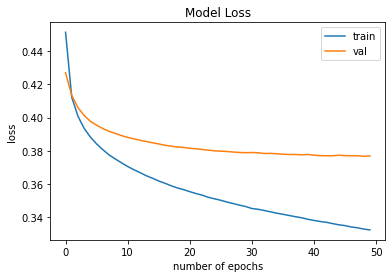

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('number of epochs')
plt.legend((['train', 'val']), loc='upper right')
plt.show()

In [ ]:
'''
## Uncomment this code to save the model weights obtained at training for all the epochs
model.save('/content/drive/MyDrive/LSTM_keras_50epochs_completedata_nonfreeze_SGD.h5')
'''

In [ ]:
 '''
## Uncomment this code to save the model history obtained at the end of training
 with open('/content/drive/MyDrive/LSTM_keras_50epochs_completedata_history_nofreeze_SGD', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)
'''

In [ ]:
model.load_weights('/content/drive/MyDrive/LSTM_keras_50epochs_completedata_nonfreeze_SGD.h5')

In [ ]:
# model.evaluate(X_LSTM, y_LSTM)
# model.evaluate(X_LSTM_test, y_LSTM_test)

In [ ]:
## Creating X, y, start end time vector on train and test data for DER calculation

## Training data
X_withoutEmbedding, y, startEndTime = read_all(TRAIN_WORKING_RECORDING_IDS[20],AMI_AUDIO_FOLDER2)

## Unknown test data
X_withoutEmbedding_test, y_test, startEndTime_test = read_all(TEST_WORKING_RECORDING_IDS[2],AMI_AUDIO_FOLDER2)

X_withoutEmbedding = np.resize(X_withoutEmbedding, (len(X_withoutEmbedding), 74, 35))

X_withoutEmbedding_test = np.resize(X_withoutEmbedding_test, (len(X_withoutEmbedding_test), 74, 35))


In [ ]:
## Modifing train data according to LSTM Model requirement
train_dataset_embedding = tf.data.Dataset.from_tensor_slices((X_withoutEmbedding, y)) 
train_dataset_embedding = train_dataset_embedding.batch(32)
train_dataset_embedding = train_dataset_embedding.map(map_data)

## Modifing test data according to LSTM Model requirement
test_dataset_embedding = tf.data.Dataset.from_tensor_slices((X_withoutEmbedding_test, y_test)) 
test_dataset_embedding = test_dataset_embedding.batch(32)
test_dataset_embedding = test_dataset_embedding.map(map_data)

In [ ]:
# Creating embedding from trained LSTM Model on train and test data

train_embeddings_tl, train_labels_tl = model.predict(train_dataset_embedding), y
test_embeddings_tl, test_labels_tl = model.predict(test_dataset_embedding), y_test

In [ ]:
print(test_embeddings_tl)

[[-0.01271877 -0.03453215  0.04176438 ...  0.09560223  0.09710424
   0.13510066]
 [-0.06133744  0.01831417 -0.00696412 ...  0.01246303 -0.01559473
   0.06674603]
 [-0.06301874  0.07340604 -0.02094223 ... -0.00749068  0.00770946
   0.02057473]
 ...
 [-0.08020467  0.00539157 -0.05296029 ...  0.11357605 -0.05051586
  -0.03753208]
 [-0.05992532  0.0854226  -0.01864077 ...  0.01440215  0.09650397
   0.04358564]
 [-0.01474831 -0.056979    0.00440371 ... -0.08049805 -0.00083139
   0.0169617 ]]


In [ ]:
X, y = np.array(train_embeddings_tl), np.array([int(i) for i in train_labels_tl])

In [ ]:
X_test, y_test =  np.array(test_embeddings_tl), np.array([int(i) for i in test_labels_tl])

# Cluster Plot of Embeddings

####PCA for Dataset Emebeddings (with True Labels)


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA

def preprocessingX(X):
  # Preprocessing the data to make it visualizable 
  raw_df = pd.DataFrame(X)  

  # Scaling the Data 
  scaler = StandardScaler() 
  X_scaled = scaler.fit_transform(raw_df) 

  # Normalizing the Data 
  X_normalized = preprocessing.normalize(X_scaled) 

  # Converting the numpy array into a pandas DataFrame 
  X_normalized = pd.DataFrame(X_normalized) 

  # Reducing the dimensions of the data 
  pca = PCA(n_components = 2) 
  X_principal = pca.fit_transform(X_normalized) 
  X_principal = pd.DataFrame(X_principal) 
  X_principal.columns = ['P1', 'P2'] 
  return X_principal

X_principal = preprocessingX(X)
X_principal_test = preprocessingX(X_test)

X_principal.head(2) 

,P1,P2
0,0.172144,0.307461
1,-0.321637,-0.115689


###Plot of Spectral Clustering When exact number of speakers known

####Using Radial Basis Function 


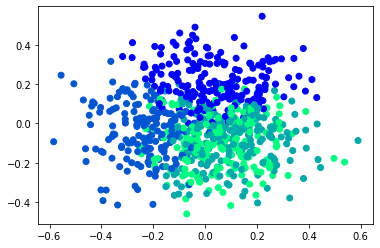

In [ ]:
from sklearn.cluster import SpectralClustering

# Building the clustering model 
spectral_model_rbf = SpectralClustering(n_clusters = 4, affinity ='rbf') 

# Training the model and Storing the predicted cluster labels 
labels_rbf = spectral_model_rbf.fit_predict(X_principal)

# Visualizing the clustering
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = SpectralClustering(n_clusters = 4, affinity ='rbf') .fit_predict(X), cmap =plt.cm.winter) 
plt.show() 

####Using Nearest Neighbours function

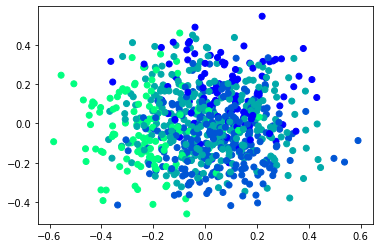

In [ ]:
# Building the clustering model 
spectral_model_nn = SpectralClustering(n_clusters = 4, affinity ='nearest_neighbors') 
  
# Training the model and Storing the predicted cluster labels 
labels_nn = spectral_model_nn.fit_predict(X_principal)

# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = SpectralClustering(n_clusters = 4, affinity ='nearest_neighbors') .fit_predict(X), cmap =plt.cm.winter) 
plt.show() 

###Plot of Spectral Clustering When number of speaker not known beforehand


### Scatter Plot with True Labels as color vector (4 clusters -> 4 speakers)

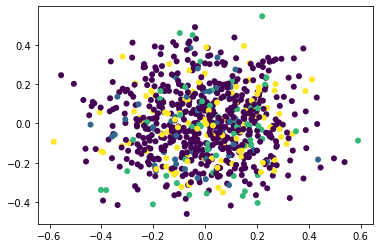

In [ ]:
c = np.random.choice(range(4), 100)

# plot the data
fig = plt.figure()
ax = fig.add_subplot(111)
# plot x,y data with c as the color vector, set the line width of the markers to 0
ax.scatter(X_principal['P1'], X_principal['P2'], c=y, lw=0)

#### Using Spectral Clustering Algorithm

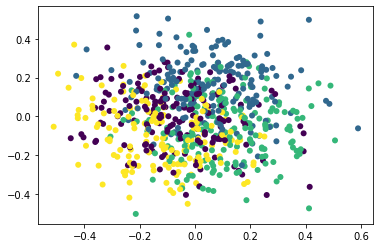

In [ ]:
from spectralcluster import SpectralClusterer

clusterer1 = SpectralClusterer(
    min_clusters=4,
    max_clusters=100,
    p_percentile=0.95,
    gaussian_blur_sigma=0.25)

labels1 = clusterer1.predict(X)
labels_test1 = clusterer1.predict(X_test)

c = np.random.choice(range(4), 100)

# plot the data
fig = plt.figure()
ax = fig.add_subplot(111)
# plot x,y data with c as the color vector, set the line width of the markers to 0
ax.scatter(X_principal_test['P1'], X_principal_test['P2'], c=labels_test1, lw=0)


#### Using Agglomerative Heirarchical Clustering Function

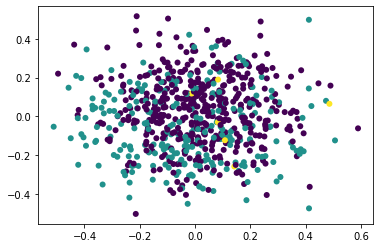

In [ ]:
import hdbscan

clusterer2 = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,
    gen_min_span_tree=False, leaf_size=40,
    metric='euclidean', min_cluster_size=4, min_samples=None, p=None)

clusterer2.fit(X)
labels2 = clusterer2.labels_

clusterer2.fit(X_test)
labels_test2 = clusterer2.labels_

c = np.random.choice(range(4), 100)

# plot the data
fig = plt.figure()
ax = fig.add_subplot(111)
# plot x,y data with c as the color vector, set the line width of the markers to 0
ax.scatter(X_principal_test['P1'], X_principal_test['P2'], c=labels_test2, lw=0)

# Make Predictions Using Embeddings


### Calculate DER values

In [ ]:
## Create Helper Fucntions to Compute DER
from pyannote.metrics.diarization import DiarizationErrorRate, GreedyDiarizationErrorRate, JaccardErrorRate

## Compute Speeker Segments from Model output
def get_hypothesis(speaker_segments):
    hypothesis = Annotation()
    for t in speaker_segments:
        try:
            hypothesis[Segment(t['start'], t['end'])] = f"{t['speaker_id']}_hyp"
        except:
            pass
        
    return hypothesis

## Compute Speeker Segments from Ground Truth
def get_ref(speaker_segments):
    reference = Annotation()
    for t in speaker_segments:
        try:
            reference[Segment(t['start'], t['end'])] = f"{t['speaker_id']}_ref"
        except:
            pass
        
    return reference

der = DiarizationErrorRate()
gder = GreedyDiarizationErrorRate()
jer = JaccardErrorRate()

## Compute DER
def measure_metrics(reference, hypothesis):
    der_value = der(reference, hypothesis)
    print('DER:', der_value)

    
    return der_value

In [ ]:
## Compute Speaker Start End Time Segments
def ref_hypo(startEndTime,startEndTime_ref,labels,y):
  speaker_segments = []
  for i in range(len(startEndTime)):
    speaker_segments.append({
                        'start': startEndTime[i][0],
                        'end': startEndTime[i][1],
                        'speaker_id': labels[i]
                    })
  speaker_segments_ref = []
  for i in range(len(startEndTime_ref)):
    speaker_segments_ref.append({
                        'start': startEndTime_ref[i][0],
                        'end': startEndTime_ref[i][1],
                        'speaker_id': y[i]
                    })
  return speaker_segments,speaker_segments_ref

# labels = labels1
labels = labels2

# labels_test = labels_test1
labels_test = labels_test2

speaker_segments,speaker_segments_ref = ref_hypo(startEndTime,startEndTime,labels,y)
speaker_segments_test,speaker_segments_ref_test = ref_hypo(startEndTime_test,startEndTime_test,labels_test,y_test)



In [ ]:
# DER for Training data
hypothesis = get_hypothesis(speaker_segments)
reference = get_ref(speaker_segments_ref)
der_value = measure_metrics(reference, hypothesis)

/usr/local/lib/python3.7/dist-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


DER: 0.381389252948886


In [ ]:
## Der for test data
hypothesis_test = get_hypothesis(speaker_segments_test)
reference_test = get_ref(speaker_segments_ref_test)
der_value = measure_metrics(reference_test, hypothesis_test)

/usr/local/lib/python3.7/dist-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


DER: 0.5291607396870555


### Visualise Overall Diarization Outcome 

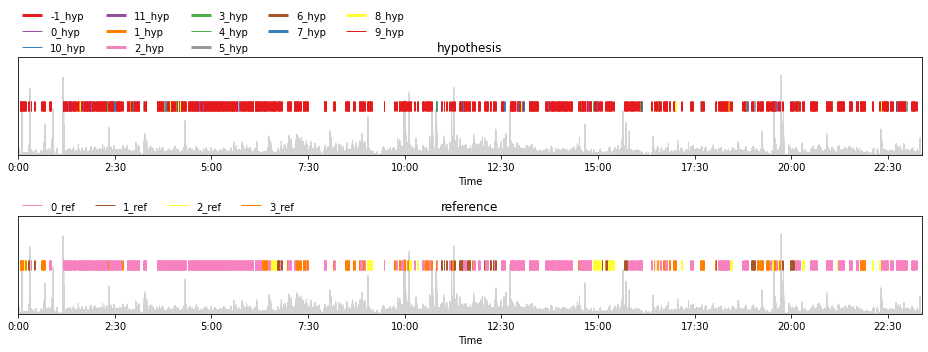

In [ ]:
import matplotlib
from matplotlib import style
import datetime
import librosa
import librosa.display

## Visualise Model Outputs as compared against the Ground Truth

def timeTicks(x, pos):
    d = datetime.timedelta(seconds=x)
    return str(d)[-5:] if x < 3600 else str(d)
formatter = matplotlib.ticker.FuncFormatter(timeTicks)

SR = 32000

def plot_der(FILEPATH,reference,hypothesis):
    fig = plt.figure(figsize=(13, 5))

    # plot hypothesis
    ax = plt.subplot(211)
    plt.title('hypothesis')
    ax.xaxis.set_major_formatter(formatter)
    wav, source_sr = librosa.load(FILEPATH, sr=SR)
    ticks_freq = ceil(len(wav) * .1 / source_sr)

    notebook.plot_annotation(hypothesis, legend=True, time=True)
    librosa.display.waveplot(wav, sr=source_sr, color='lightgray')

    # plot reference
    ax = plt.subplot(212)
    plt.title('reference')
    ax.xaxis.set_major_formatter(formatter)

    notebook.plot_annotation(reference, legend=True, time=True)
    librosa.display.waveplot(wav, sr=source_sr, color='lightgray')

    plt.margins(x=0.01)
    plt.tight_layout()
    plt.show()

%matplotlib inline

plot_der(os.path.join(os.path.join(AMI_AUDIO_FOLDER2,'ES2009a','audio'),'ES2009a.Mix-Headset.wav'),reference,hypothesis)

